In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

Given some function real-world data $x$ and $y$, the goal of curve fitting is to find some model function, $f$, that best approximates the data by optimizing unknown paramaters, $\beta$, to give $f(x, \beta)$.

The standard approach for discovering the optimized parameters and thus the line of best fit is known as the method of least squares. The method of least squares seeks to minimize $\sum_i(f(x_i, \beta) - y_i)^2$, where $x_i$ and $y_i$ are the ith data points.

In [2]:
df = pd.read_csv("/Users/twk/Documents/curve_fitting/data/noise_parabolic_data.csv")
x_data = np.array(df.X)
y_data = np.array(df.y)

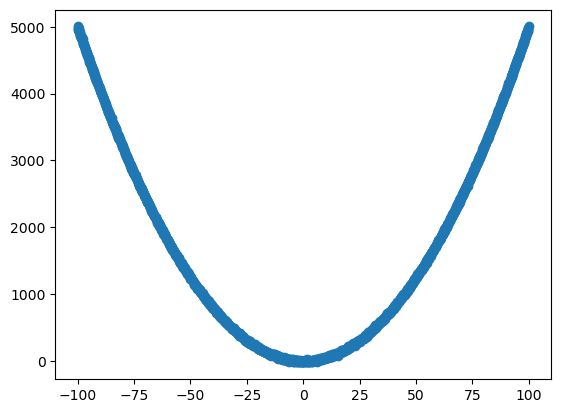

In [3]:
plt.scatter(x_data, y_data)
plt.show()

In [4]:
def model_f(x, a, b, c):
    return a * x ** 2 + b * x + c

In [5]:
popt, pcov = curve_fit(model_f, x_data, y_data, p0 = [1, 1, 1])

In [6]:
a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt)

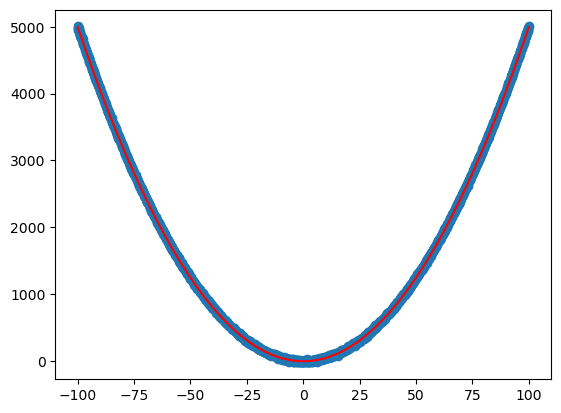

In [7]:
plt.scatter(x_data,y_data)
plt.plot(x_model,y_model, color = 'r')
plt.show()

$R^2$ is a description of how much better a curve describes a given set of data relative to its mean. For example, if the mean of a data set offers a better predictions of an outcome than the fitting equation, then $R^2$ will be low. However, if the data is well modeled, the $R^2$ will approach 1.

In [8]:
def r_squared(x_data, y_data, function, *popt):
    # first, calculate the sum of the square difference between the curve and the data
    l = []
    for x, y in zip(x_data, y_data):
        diff = y - function(x, *popt)
        l.append(diff ** 2)
    residual_square_sum = sum(l)
    
    # next, calculate the sum of the square difference between the data and its mean
    y_mean = np.mean(y_data)
    l = []
    f = []
    for num in y_data:
        l.append((num - y_mean) ** 2)
        f.append(num - y_mean)
    total_square_sum = sum(l)
    
    # r_squared is 1 - residual sum of squares divided by total sum of squares
    return (total_square_sum - residual_square_sum) / total_square_sum

In [9]:
print(r_squared(x_data, y_data, model_f, *popt))

0.9999541126371995
